In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import tensorflow as tf
from tensorflow import keras

def grid(n, prob):
    """
    Construct a grid with dimension n with probability prob
    """
    return np.random.choice([0, 1], size=(n, n), p=[prob, 1-prob])



In [2]:
def writing_data(samples, n, prob):
    """
    samples: number of samples (int)
    n: size of matrix  (odd int)
    prob: probability of getting 1 or 0 (0<=prob<=1)
    """
    count = 0.
    mat = []
    vd = np.zeros(samples)
    for ind in range(samples):
        b = grid(n, prob)
        mat.append(cp.copy(b)) #Used copy to not have 2 on the matrix
        b[(n-1)//2][(n-1)//2] = 2
        stop = False
        while not stop:
            change = False
            for i, j in zip(*np.where(b == 2)):
                if i == 0 or j == 0 or i == n - 1 or j == n - 1:
                    count += 1
                    stop = True
                    vd[ind] = 1
                    break
                if b[i+1, j] == 0:
                    b[i+1, j] = 2
                    change = True
                if b[i, j+1] == 0:
                    b[i, j+1] = 2
                    change = True
                if b[i-1, j] == 0:
                    b[i-1, j] = 2
                    change = True
                if b[i, j-1] == 0:
                    b[i, j-1] = 2
                    change = True
            if not change:
                stop = True
    return np.array(mat),vd

# Build a model

In this case I use a simple Neural Network with one input layer and one hidden layer with output 0 (if the matrix don't percolate) or 1 (if the matrix percolate).

In [3]:
n = 15
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(n, n)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


# Make the Training data

In [4]:
#traning data
td,tr = writing_data(1000,n,0.5)

# Show sample of data

1.0


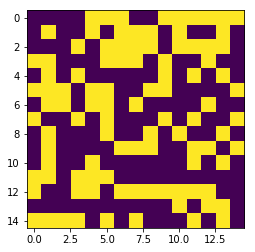

In [5]:
plt.imshow(td[0])
print(tr[0])

# Training the model

In [6]:
model.fit(td,tr, epochs = 12)

Epoch 1/12
1000/1000 [==============================] - 0s 221us/sample - loss: 0.7419 - acc: 0.5170
Epoch 2/12
1000/1000 [==============================] - 0s 95us/sample - loss: 0.5983 - acc: 0.6730
Epoch 3/12
1000/1000 [==============================] - 0s 92us/sample - loss: 0.5302 - acc: 0.7530
Epoch 4/12
1000/1000 [==============================] - 0s 96us/sample - loss: 0.4934 - acc: 0.7760
Epoch 5/12
1000/1000 [==============================] - 0s 107us/sample - loss: 0.4253 - acc: 0.8220
Epoch 6/12
1000/1000 [==============================] - 0s 93us/sample - loss: 0.3804 - acc: 0.8520
Epoch 7/12
1000/1000 [==============================] - 0s 97us/sample - loss: 0.3341 - acc: 0.8850
Epoch 8/12
1000/1000 [==============================] - 0s 103us/sample - loss: 0.2708 - acc: 0.9300
Epoch 9/12
1000/1000 [==============================] - 0s 93us/sample - loss: 0.2451 - acc: 0.9380
Epoch 10/12
1000/1000 [==============================] - 0s 102us/sample - loss: 0.1905 - acc: 0.

# Testing the model

In [7]:
test_mat,test_v = writing_data(100,n,0.6)
test_loss, test_acc = model.evaluate(test_mat, test_v)
print('Test accuracy:', test_acc)

100/100 [==============================] - 0s 644us/sample - loss: 0.5893 - acc: 0.7200
('Test accuracy:', 0.72)


# Plotting the probability versus the accuracy of the method

We have a plot that shows that the accuracy decreases on the critical probability for the model.

The way to acquire data for the plot is given in the line below the plot

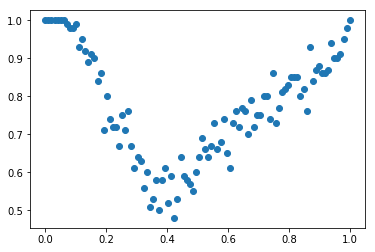

In [9]:
plt.plot(probability,acc, 'o')
plt.show()

In [8]:
probability = np.linspace(0.,1.,100)
acc = np.zeros(len(probability))
for i,v in enumerate(probability):
    #test data
    test_mat,test_v = writing_data(100,n,v)
    #evaluate accuracy
    test_loss, test_acc = model.evaluate(test_mat, test_v)
    acc[i] = test_acc

100/100 [==============================] - 0s 89us/sample - loss: 0.2829 - acc: 0.9400


100/100 [==============================] - 0s 75us/sample - loss: 0.4687 - acc: 1.0000


# Building another model

This time I will use Convolutional Neural Networks with 2 convolutional + pooling layers before entering the Neural Network structure that is the same as the previous one.

In [62]:
n = 15
model = keras.Sequential([
    keras.layers.Conv2D(64,kernel_size=3, activation=tf.nn.relu, input_shape=(n,n,1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    keras.layers.Conv2D(64, (5, 5), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
#traning data
td,tr = writing_data(1000,n,0.5)
td = td.reshape(-1,n,n,1) 

In [63]:
model.fit(td,tr, epochs = 12)

Epoch 1/12
1000/1000 [==============================] - 1s 602us/sample - loss: 0.6962 - acc: 0.5080
Epoch 2/12
1000/1000 [==============================] - 0s 364us/sample - loss: 0.6848 - acc: 0.5460
Epoch 3/12
1000/1000 [==============================] - 0s 371us/sample - loss: 0.6631 - acc: 0.5890
Epoch 4/12
1000/1000 [==============================] - 0s 352us/sample - loss: 0.5976 - acc: 0.7070
Epoch 5/12
1000/1000 [==============================] - 0s 351us/sample - loss: 0.4935 - acc: 0.7600
Epoch 6/12
1000/1000 [==============================] - 0s 351us/sample - loss: 0.4518 - acc: 0.7890
Epoch 7/12
1000/1000 [==============================] - 0s 358us/sample - loss: 0.3957 - acc: 0.8390
Epoch 8/12
1000/1000 [==============================] - 0s 360us/sample - loss: 0.3258 - acc: 0.8820
Epoch 9/12
1000/1000 [==============================] - 0s 357us/sample - loss: 0.3081 - acc: 0.8770
Epoch 10/12
1000/1000 [==============================] - 0s 390us/sample - loss: 0.2493 - a

# Plotting the probability versus the accuracy of the method

We have a plot that shows that the accuracy decreases on the critical probability for the model.

The way to acquire data for the plot is given in the line below the plot

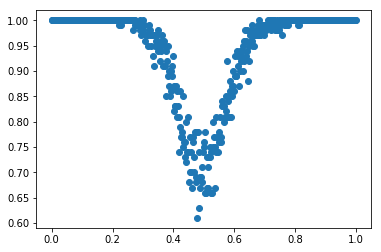

In [67]:
plt.plot(probability,acc, 'o')
plt.show()

Adjusting a Gaussian, the percolation probability is given by

In [90]:
print("Percolation probability:%.5f" % popt[1])

Percolation probability:0.49347


In [66]:
probability = np.linspace(0.,1.,500)
acc = np.zeros(len(probability))
for i,v in enumerate(probability):
    #test data
    test_mat,test_v = writing_data(100,n,v)
    test_mat = test_mat.reshape(-1,n,n,1) 
    #evaluate accuracy
    test_loss, test_acc = model.evaluate(test_mat, test_v)
    acc[i] = test_acc

100/100 [==============================] - 0s 252us/sample - loss: 0.0062 - acc: 1.0000


100/100 [==============================] - 0s 171us/sample - loss: 0.1371 - acc: 0.9500


100/100 [==============================] - 0s 190us/sample - loss: 0.5996 - acc: 0.7600


100/100 [==============================] - 0s 173us/sample - loss: 6.3460e-05 - acc: 1.0000


100/100 [==============================] - 0s 155us/sample - loss: 1.9649e-05 - acc: 1.0000


100/100 [==============================] - 0s 189us/sample - loss: 0.0031 - acc: 1.0000


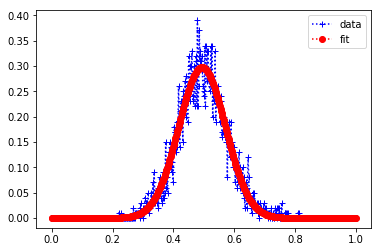

In [81]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))
x = probability
y = 1 - acc

popt,pcov = curve_fit(gaus,x,y, p0=[0.5,0.3,sigma])
plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),'ro:',label='fit')
plt.legend()

In [90]:
print("Percolation probability:%.5f" % popt[1])

Percolation probability:0.49347
